In [1]:
from utils import BMML2_open_tests as test


In [2]:
from utils import yusov as prototypes
import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
X, F, B, A, q = test.generate_data(50, 50, 10, 20, 20, use_MAP=False)

In [4]:
test.check_e_step()

In [5]:
test.check_e_step_time()

In [6]:
test.check_m_step()

(7, 8, 2) (2, 3) (7, 8) (6, 6) (6, 6, 2)


In [8]:
H, W, K = 7, 8, 2
h, w = 2, 3
X, F, B, A, q = test.generate_data(H, W, K, h, w, False)

In [10]:
F_pred = prototypes.update_F(q, X, False)

In [11]:
B_pred = prototypes.update_B(q, X, h, w, False)
B_pred.shape

(7, 8)

In [12]:
import matplotlib.pyplot as plt

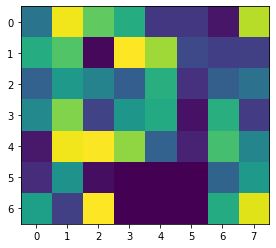

In [13]:
plt.imshow(X[:, :, 0])

Text(0.5, 1.0, 'Image 2')

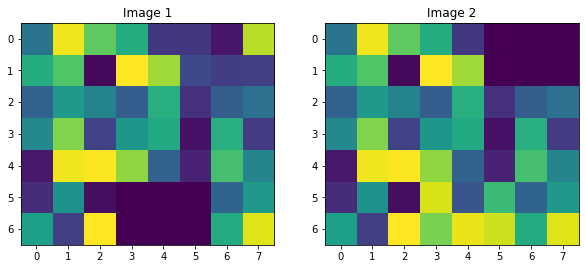

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(X[:, :, 0])
ax1.set_title("Image 1")
ax2.imshow(X[:, :, 1])
ax2.set_title("Image 2")

Text(0.5, 1.0, 'predicted B')

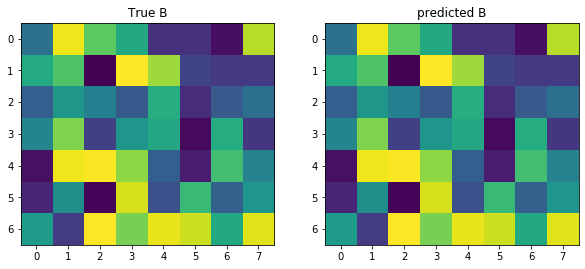

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(B)
ax1.set_title("True B")
ax2.imshow(B_pred)
ax2.set_title("predicted B")

Text(0.5, 1.0, 'predicted F')

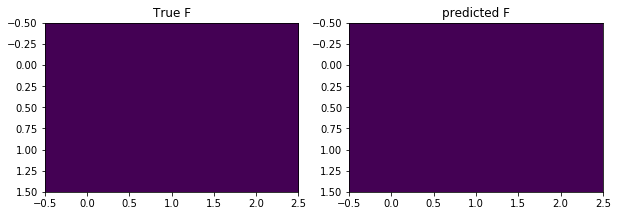

In [23]:
F_pred = prototypes.update_F(q, X, False)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(F)
ax1.set_title("True F")
ax2.imshow(np.around(F_pred, 5))
ax2.set_title("predicted F")

In [59]:
test.check_m_step()
test.check_m_step_time()

(7, 8, 2) (2, 3) (7, 8) (6, 6) (6, 6, 2)
0.48824348699963593


## Download Data

In [75]:
data = np.load("data/data_shad19_1000.npy")
h, w = 102, 74

In [76]:
LL = prototypes.run_EM(data, h, w, tolerance=0, )

s 115.85311473116346
Iteration 0/50, ELBO: -131903424.35433017
s 115.8857948295635
Iteration 1/50, ELBO: -131869995.41705641
s 115.79629152244426
Iteration 2/50, ELBO: -131850247.47478023
s 115.73626591893073
Iteration 3/50, ELBO: -131837505.0737998
s 115.70681550892957
Iteration 4/50, ELBO: -131827662.76038384
s 115.69911312137661
Iteration 5/50, ELBO: -131823834.32404363
s 115.69548681552196
Iteration 6/50, ELBO: -131821842.72453462
s 115.68948814923007
Iteration 7/50, ELBO: -131820580.77513538
s 115.68577178452925
Iteration 8/50, ELBO: -131819733.3018958
s 115.68201622097033
Iteration 9/50, ELBO: -131819150.47122481
s 115.68015869207092
Iteration 10/50, ELBO: -131818721.61239105
s 115.67776294390865
Iteration 11/50, ELBO: -131818352.67901288
s 115.67662406474842
Iteration 12/50, ELBO: -131818106.2813035
s 115.67682449790648
Iteration 13/50, ELBO: -131817928.84957904
s 115.67693504136905
Iteration 14/50, ELBO: -131817719.02350819
s 115.67583917986838
Iteration 15/50, ELBO: -131817571

In [78]:
q, F, B, s, A = LL[-1]

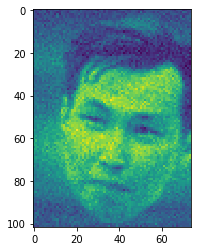

In [81]:
plt.imshow(F)
plt.savefig("./imgs/villain_face.png")

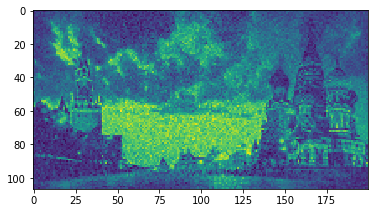

In [82]:
plt.imshow(B)
plt.savefig("./imgs/background.png")

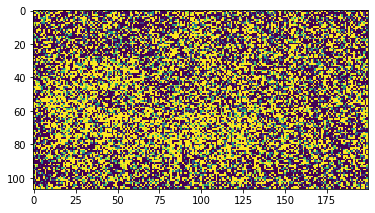

In [87]:
plt.imshow(data[:, :, 0])
plt.savefig("./imgs/sample_image.png")

In [85]:
LL_array = np.asarray(LL)
LL_array.shape

(50, 5)

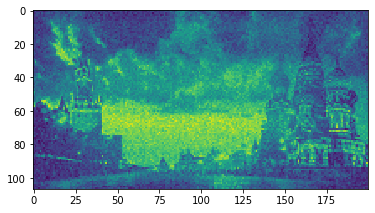

In [89]:
plt.imshow(np.sum(data, axis=-1))
plt.savefig("./imgs/mean_image.png")

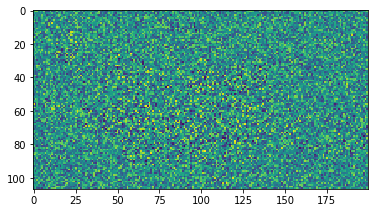

In [91]:
mean = np.mean(data, axis=-1)
plt.imshow(np.sum(data - np.expand_dims(mean, axis=-1), axis=-1))

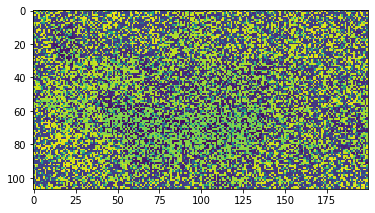

In [94]:
plt.imshow(data[:, :, 0] - mean)